Measuring Model Performanc

In [2]:
from sklearn.model_selection import train_test_split



Introduction to regression

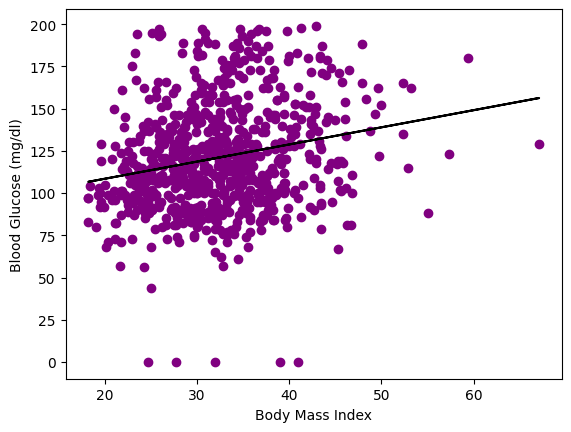

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# initializing Model
reg = LinearRegression()

# reading file
diabetes_df = pd.read_csv('diabetes.csv')

# Creating Feature and target array
diabetes_df = diabetes_df.query('BMI > 0')

# Seperating Feature (x) and Target (Y)
X = diabetes_df.drop("Glucose",axis=1).values
Y = diabetes_df['Glucose'].values

# PLotting of BMI agains Glucose
X_bmi = X[:,4]

# Reshaping it as 2D array
X_bmi = X_bmi.reshape(-1,1)


# Creating a best fit using linear regression
reg.fit(X_bmi,Y)
predictions = reg.predict(X_bmi)

# plotting the graph and best fit
plt.scatter(X_bmi,Y,color='purple')
plt.plot(X_bmi,predictions,color='black')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()





## Linear Regression Mechanics

### One dimension
### y = ax + b
- Simple linear regression uses one feature 
    - y = target 
    - x = single feature
    - a,b = parameters/Coefficients of the model - slope , intercept
- How do we choose a and b
    - define an error function for any given line
    - choose the line that minimizes the error function 
- Error function = loss funtion = cost function
- Error function can also be called uncertainity**

### Higher dimension
### y = a1x1 + a2x2 + ........ aNxN + b
- To fit a linear regression model here :
    - Need to 3 variables a1,a2,b specify
- higher dimensions
    - known as multiple regression
    - must specify coefficients for each feature and the variable b

### R-squared
- R^2 quantities the variance in target values
    - explained by the feature
    - Values range from 0 to 1

# Linear Regression using all features

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)

# R-squared in scikit-learn


### Why do we use R-squared (R²) in scikit-learn?
    - When we build a regression model, we want to know:
    - How good is my model at explaining the data?
### R² tells us how much of the change in y is explained by x
    - R² = 1.0 → Perfect prediction 
    - R² = 0.0 → Model explains nothing 
    - R² = 0.7 → Model explains 70% of the variation 

In [5]:
reg_all.score(X_test,y_test)

0.325725500462255

# RMSE in scikit-learn

### RMSE (Root Mean Squared Error) tells us:
- RMSE shows how wrong the model is
    - Smaller RMSE = better model
    - Bigger RMSE = worse model

### Why do we use RMSE?
-
    - It gives error in the same unit as output (marks, price, temperature)
    - It penalizes big mistakes more 
    - Easy to explain and interpret


In [6]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test , y_pred)


25.058387761097457

# Cross-Validation 
- After training a model, evaluating its performance on test data can be affected by how the data was split.
- Cross-validation splits the data into multiple parts (folds) to get a more reliable estimate of model performance.
- In k-fold cross-validation, the data is divided into k parts, and the model is trained and tested k times, each time with a different part as the test set.
- This process provides multiple scores, which can be summarized with statistics like the mean and confidence intervals.
- Using more folds gives a better estimate but requires more computation.

In [7]:
from sklearn.model_selection import cross_val_score , KFold
kf = KFold(n_splits=6 , shuffle=True , random_state=42)

# returns an array of cross validation scores
cv_results = cross_val_score(reg,X,X,cv=kf)
print(cv_results)

print(np.mean(cv_results) , np.std(cv_results))


[1. 1. 1. 1. 1. 1.]
1.0 0.0


# Regularization
- Recall :Linear regression minimizes a loss function
- It chooses a coefficients can lead to overfitting
- large coeffecients can lead to overfitting
- Regularization : Penalize large coefficients

### Type 1 : Ridge Regression
- Ridge regression is a way to stop the model from overfitting.
- Cost = MSE+α∑(ai2​)
- MSE → Mean squared error (like normal linear regression)
- α (alpha) → How strong the penalty is
- a_i → Coefficients of your features

In [9]:
from sklearn.linear_model import Ridge
scores = []

for alpha in [0.1,1.0,10.0,100,1000]:
    ridge = Ridge(alpha=alpha)
    print(ridge)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))

print(scores)

Ridge(alpha=0.1)
Ridge()
Ridge(alpha=10.0)
Ridge(alpha=100)
Ridge(alpha=1000)
[0.32571287530550685, 0.3255896752977049, 0.32358223957879306, 0.2887575646719478, 0.2116519342409462]


### Type 2 : Lasso Regression
- Cost=MSE+α∑∣ai​∣
- Lasso stands for Least Absolute Shrinkage and Selection Operator.
- Like Ridge, it’s a version of linear regression that adds a penalty to avoid overfitting.
- Difference from Ridge:
- Ridge shrinks coefficients but never makes them exactly zero.
- Lasso can shrink some coefficients all the way to zero → effectively removing features.

In [10]:
from sklearn.linear_model import Lasso
scores = []

for alpha in [0.1,1.0,10.0,100,1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test,y_test))

print(scores)

[0.32732402255368664, 0.3255132211818268, 0.1837038596390258, 0.06484188036673233, 0.021607737261746363]


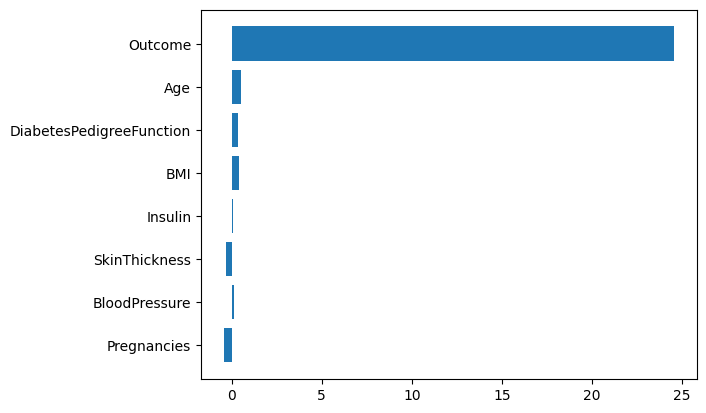

In [13]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("Glucose",axis=1).values
Y = diabetes_df['Glucose'].values
names = diabetes_df.drop("Glucose",axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,Y).coef_

plt.barh(names,lasso_coef)
# plt.xticks(rotation=45)
plt.show()